In [1]:
# import Data manipulation library
import numpy as np
import pandas as pd
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#import data filter warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data using url  from github
url = 'https://raw.githubusercontent.com/anirudhakolay/SUPPLYCHAIN/refs/heads/main/SCM.csv'
df = pd.read_csv(url)
df.sample(frac=1)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
18129,WH_118129,EID_68129,Rural,Small,South,Zone 6,7,0,3,5003,...,0,243,24.0,NaN,4,1,C,1,2,5134
17247,WH_117247,EID_67247,Rural,Large,West,Zone 6,1,2,6,4189,...,1,158,36.0,NaN,25,0,C,2,23,32116
13200,WH_113200,EID_63200,Rural,Large,South,Zone 6,6,0,2,7615,...,1,270,NaN,2021.0,0,0,NaN,0,29,8106
10826,WH_110826,EID_60826,Rural,Large,West,Zone 6,2,0,4,5674,...,0,75,20.0,NaN,0,0,NaN,0,29,3103
4221,WH_104221,EID_54221,Rural,Large,South,Zone 6,2,1,2,5555,...,1,145,21.0,NaN,12,0,B+,4,29,14064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13363,WH_113363,EID_63363,Rural,Mid,West,Zone 2,3,0,3,7516,...,1,153,23.0,1997.0,33,0,A,6,1,44080
22044,WH_122044,EID_72044,Rural,Large,North,Zone 6,4,1,3,4708,...,1,185,39.0,NaN,27,1,A+,6,6,35121
13432,WH_113432,EID_63432,Rural,Large,South,Zone 5,1,1,2,5392,...,1,264,35.0,NaN,20,0,A+,5,14,26112
178,WH_100178,EID_50178,Rural,Large,South,Zone 5,8,0,2,4532,...,1,212,27.0,2008.0,24,1,B,5,14,31076


In [3]:
#CHECKING INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
df['workers_num'].isnull().sum()/len(df['workers_num'])*100
# null value is acceptable upto 5% and >15% it is critical stage

3.959367945823928

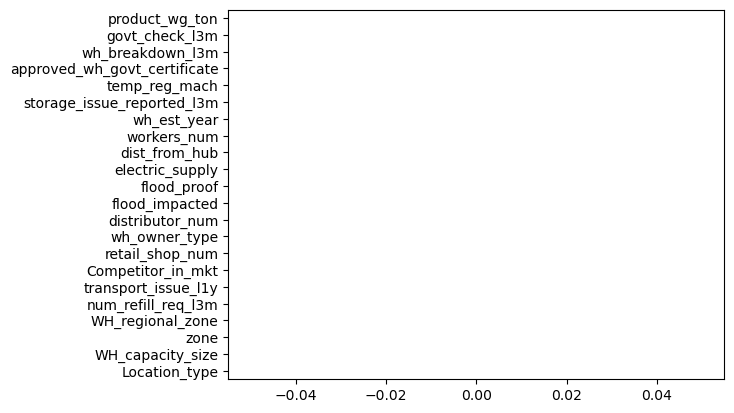

In [58]:
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [5]:
df['workers_num'].median()

28.0

In [6]:
df['workers_num'].mean()

28.93639825130447

In [7]:
df['workers_num'].quantile(0.75),df['workers_num'].quantile(0.25)

(33.0, 24.0)

In [8]:
#IMPUTE ONLY INTEGER VALUE WHEN VALUE IS NULL WHICH IS MEAN , MEDIAN OR IQR
df['workers_num'].fillna(28,inplace = True )

In [9]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [10]:
df['wh_est_year'].fillna('2000',inplace=True)

In [11]:
df['wh_est_year'].mode()

0    2000
Name: wh_est_year, dtype: object

In [12]:
df['approved_wh_govt_certificate'].fillna('C',inplace= True)

In [13]:
# seprate categorical and numerical columns 
categorical_columns = df.select_dtypes(include = 'object')

In [14]:
numerical_columns = df.select_dtypes(exclude = 'object')

In [15]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,wh_est_year,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,2000,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,2000,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,2000,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,2000,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,2009.0,C
...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,2007.0,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,2000,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,2000,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,2000,B


In [46]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID'],inplace= True)

KeyError: "['Ware_house_ID', 'WH_Manager_ID'] not found in axis"

In [47]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2000,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2000,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2000,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2000,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071


In [69]:
#evaluate the data for west zone 
df[df['zone']==3]

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2000,13,0,0,5,15,17115
5,0,2,3,0,8,0,2,5053,1,37,...,1,152,35.0,2009.0,23,1,1,3,3,32134
6,0,0,3,5,8,0,4,4449,0,38,...,1,77,27.0,2010.0,24,0,2,3,6,30142
14,0,2,3,5,8,1,4,5022,1,68,...,1,129,37.0,2000,6,0,2,3,9,7055
16,0,1,3,3,0,0,2,5569,0,16,...,1,231,28.0,2000,9,0,3,5,11,12127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22119,0,0,3,5,8,0,4,4687,1,62,...,1,160,26.0,2005.0,32,0,2,3,23,40086
22138,0,1,3,3,7,0,3,4686,0,55,...,1,148,28.0,2010.0,23,0,3,6,11,29130
22139,0,1,3,2,5,0,4,3771,1,66,...,0,97,30.0,1998.0,24,0,4,2,19,30102
22140,0,0,3,4,7,0,4,4593,1,18,...,1,78,24.0,2008.0,18,0,3,6,14,21128


In [70]:
#evaluate the data for west zone 
df[df['zone']=='West']

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton


<AxesSubplot:ylabel='zone'>

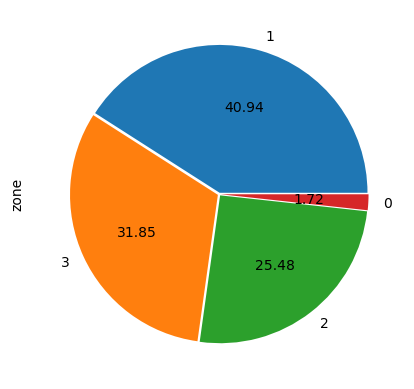

In [49]:
df['zone'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.01,0.01,0.01,0.01])

In [50]:
southzone = df[df['zone']=='South']

In [51]:
southzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton


In [59]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,wh_est_year,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,2000,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,2000,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,2000,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,2000,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,2009.0,C
...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,2007.0,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,2000,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,2000,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,2000,B


In [60]:
df['Location_type'].value_counts()

0    20334
1     1816
Name: Location_type, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location_type']= le.fit_transform(df['Location_type'])

In [62]:
df['Location_type'].value_counts()

0    20334
1     1816
Name: Location_type, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder#-------CONVERT CATEGORICAL TO NUMERICAL
le = LabelEncoder()
df['WH_capacity_size']= le.fit_transform(df['WH_capacity_size'])

In [64]:
df['WH_capacity_size'].value_counts()

0    8968
1    8902
2    4280
Name: WH_capacity_size, dtype: int64

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 22150 non-null  int32  
 1   WH_capacity_size              22150 non-null  int32  
 2   zone                          22150 non-null  object 
 3   WH_regional_zone              22150 non-null  object 
 4   num_refill_req_l3m            22150 non-null  int64  
 5   transport_issue_l1y           22150 non-null  int64  
 6   Competitor_in_mkt             22150 non-null  int64  
 7   retail_shop_num               22150 non-null  int64  
 8   wh_owner_type                 22150 non-null  object 
 9   distributor_num               22150 non-null  int64  
 10  flood_impacted                22150 non-null  int64  
 11  flood_proof                   22150 non-null  int64  
 12  electric_supply               22150 non-null  int64  
 13  d

In [65]:
southzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton


In [30]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2000,13,0,A,5,15,17115
1,0,0,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,2000,4,0,A,3,17,5074
2,0,1,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2000,17,0,A,6,22,23137
3,0,1,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,2000,17,1,A+,3,27,22115
4,0,0,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,North,Zone 6,8,1,3,5030,Rented,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,0,2,South,Zone 6,3,1,3,4320,Rented,60,...,0,170,28.0,2000,26,0,C,5,9,33108
22147,0,0,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,99,22.0,2000,20,0,B+,6,4,24072
22148,0,0,North,Zone 6,6,2,4,4378,Rented,32,...,0,220,17.0,2000,13,0,B,3,28,15055


In [31]:
'''
WHENEVER YOU ARE ENCODING ANY COLUMN FROM DATASET MAKE SURE THAT YOU SHOULD NOT USE LABELENCODER,ONE-HOTENCODER,ORDINALENCODER FOR TARGET COLUMN
INDEPENDENT COLUMN IS DENOTED BY CAPITAL X BEACAUSE IN WHICH MULTIPLE COLUMNS INCLUDE 
BUT IN TARGET COLUMN DENOTED BY SMALL y BEACAUSE ONE COLUMN IS INCLUDE
'''

'\nWHENEVER YOU ARE ENCODING ANY COLUMN FROM DATASET MAKE SURE THAT YOU SHOULD NOT USE LABELENCODER,ONE-HOTENCODER,ORDINALENCODER FOR TARGET COLUMN\nINDEPENDENT COLUMN IS DENOTED BY CAPITAL X BEACAUSE IN WHICH MULTIPLE COLUMNS INCLUDE \nBUT IN TARGET COLUMN DENOTED BY SMALL y BEACAUSE ONE COLUMN IS INCLUDE\n'

In [32]:
df['zone'].value_counts()

North    9069
West     7055
South    5644
East      382
Name: zone, dtype: int64

In [33]:
df['zone']=le.fit_transform(df['zone'])

In [34]:
df['zone'].value_counts()

1    9069
3    7055
2    5644
0     382
Name: zone, dtype: int64

In [35]:
df['WH_regional_zone'].value_counts()

Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: WH_regional_zone, dtype: int64

In [36]:
df['WH_regional_zone']=le.fit_transform(df['WH_regional_zone'])

In [37]:
df['WH_regional_zone'].value_counts()

5    7376
4    4045
3    3708
1    2642
2    2552
0    1827
Name: WH_regional_zone, dtype: int64

In [38]:
df['wh_owner_type'].value_counts()

Company Owned    12035
Rented           10115
Name: wh_owner_type, dtype: int64

In [71]:
df['wh_owner_type']=le.fit_transform(df['wh_owner_type'])

In [40]:
df['wh_owner_type'].value_counts()

0    12035
1    10115
Name: wh_owner_type, dtype: int64

In [72]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2000,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2000,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2000,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2000,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071


In [68]:
df['approved_wh_govt_certificate'].value_counts()

4    5664
3    4321
2    4269
0    4158
1    3738
Name: approved_wh_govt_certificate, dtype: int64

In [67]:
df['approved_wh_govt_certificate']=le.fit_transform(df['approved_wh_govt_certificate'])

In [66]:
df['approved_wh_govt_certificate'].value_counts()

4    5664
3    4321
2    4269
0    4158
1    3738
Name: approved_wh_govt_certificate, dtype: int64

In [44]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2000,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2000,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2000,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2000,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,1,2,4,29138
22146,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,2000,26,0,4,5,9,33108
22147,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,2000,20,0,3,6,4,24072
22148,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,2000,13,0,2,3,28,15055


In [45]:
'''
data is normaly distrubuted then standerd scaler
data is non normal distrubuted then min max scaler
data is non normal distrubuted and also outliers is more than 5% then use robust scaler
'''

'\ndata is normaly distrubuted then standerd scaler\ndata is non normal distrubuted then min max scaler\ndata is non normal distrubuted and also outliers is more than 5% then use robust scaler\n'

In [76]:
df.select_dtypes(include = 'object')

,wh_est_year
0,2000
1,2000
2,2000
3,2000
4,2009.0
...,...
22145,2007.0
22146,2000
22147,2000
22148,2000


In [74]:
df['wh_est_year'].value_counts()

2000      10545
2000.0      495
2002.0      479
2006.0      475
2014.0      474
2007.0      465
2004.0      458
2016.0      454
2001.0      450
1998.0      449
2018.0      448
2013.0      447
2019.0      445
2020.0      445
2005.0      444
2017.0      442
2010.0      441
2015.0      441
2012.0      441
2008.0      432
2009.0      431
2021.0      430
2011.0      424
1999.0      423
2003.0      404
1997.0      294
2022.0      291
1996.0      162
2023.0      121
Name: wh_est_year, dtype: int64

In [75]:
df['wh_est_year']=le.fit_transform(df['wh_est_year'])

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']

In [77]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2000,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2000,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2000,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2000,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,1,2,4,29138
22146,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,2000,26,0,4,5,9,33108
22147,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,2000,20,0,3,6,4,24072
22148,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,2000,13,0,2,3,28,15055


In [78]:
df['wh_est_year'].value_counts()

2000      10545
2000.0      495
2002.0      479
2006.0      475
2014.0      474
2007.0      465
2004.0      458
2016.0      454
2001.0      450
1998.0      449
2018.0      448
2013.0      447
2019.0      445
2020.0      445
2005.0      444
2017.0      442
2010.0      441
2015.0      441
2012.0      441
2008.0      432
2009.0      431
2021.0      430
2011.0      424
1999.0      423
2003.0      404
1997.0      294
2022.0      291
1996.0      162
2023.0      121
Name: wh_est_year, dtype: int64

In [79]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2000,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2000,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2000,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2000,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,1,2,4,29138
22146,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,2000,26,0,4,5,9,33108
22147,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,2000,20,0,3,6,4,24072
22148,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,2000,13,0,2,3,28,15055


In [83]:
'''
5-10%- impute by median, i.e CAPING
CAPING- handle outliers
15% outliers- trim
2.5-2.5% outliers must be kept, bias rehna chahiye
Bias- errors, cant be neglected else overfit
Variance- spread of the data
higher SD more issue
Non-Normal distributed data- use MinMaxScaler sklearn
Normal distributed data- StandardScaler(sensitive with outliers)
Cannot cap/trim outliers- RobustScaler(not thaht sensitive with outliers), when outliers are more
Train Data/Seen Data
Test Data/Unseen Data
If seen n unseen data mixes DATA LEAK
split this train n test data to avoid this
transform- test data, Unseen
fit_transform- train data, seen

'''

'\n5-10%- impute by median, i.e CAPING\nCAPING- handle outliers\n15% outliers- trim\n2.5-2.5% outliers must be kept, bias rehna chahiye\nBias- errors, cant be neglected else overfit\nVariance- spread of the data\nhigher SD more issue\nNon-Normal distributed data- use MinMaxScaler sklearn\nNormal distributed data- StandardScaler(sensitive with outliers)\nCannot cap/trim outliers- RobustScaler(not thaht sensitive with outliers), when outliers are more\nTrain Data/Seen Data\nTest Data/Unseen Data\nIf seen n unseen data mixes DATA LEAK\nsplit this train n test data to avoid this\ntransform- test data\nfit_transform- train data\n'

In [89]:
#Prevent Data Leaking
#Step 1: Split the dataset into x and y
#Independent Column
X = df.drop(columns = 'product_wg_ton', axis = 1)
#Dependent Column/ Target Column
y = df['product_wg_ton']

In [86]:
X

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,...,1,1,91,29.0,2000,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,...,0,1,210,31.0,2000,4,0,0,3,17
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,161,37.0,2000,17,0,0,6,22
3,0,1,1,2,7,4,2,6000,1,50,...,0,0,103,21.0,2000,17,1,1,3,27
4,0,0,1,4,3,1,2,4740,0,42,...,0,1,112,25.0,2009.0,18,0,4,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,0,1,203,28.0,2007.0,22,1,1,2,4
22146,0,2,2,5,3,1,3,4320,1,60,...,0,0,170,28.0,2000,26,0,4,5,9
22147,0,0,1,5,7,2,2,5268,0,64,...,0,0,99,22.0,2000,20,0,3,6,4
22148,0,0,1,5,6,2,4,4378,1,32,...,0,0,220,17.0,2000,13,0,2,3,28


In [90]:
y #target/depedent col

0        17115
1         5074
2        23137
3        22115
4        24071
         ...  
22145    29138
22146    33108
22147    24072
22148    15055
22149    14103
Name: product_wg_ton, Length: 22150, dtype: int64

In [91]:
#Step 2: SPlit data into Train and Test 
#Train data: Seen Data
#Test Data: Unseen Data
from sklearn.model_selection import train_test_split

#Split 30% of data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)